<a href="https://colab.research.google.com/github/xslittlemaggie/Deep-Learning-Machine-Learning-Projects/blob/master/Stock_Analysis_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from datetime import datetime

# import visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from pandas_datareader.data import DataReader  # two methods to read data from websites
import pandas_datareader.data as pdweb

In [0]:
# 'AAPL': apple
# GOOG': google
# 'MSFT': microsoft
# 'AMZN': amazon
# 'FB': facebook
# 'TWTR':twitter
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'TWTR']

In [0]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [0]:
end

datetime.datetime(2018, 11, 21, 13, 7, 56, 335966)

## Part 1: Importing data with two different methods 

### Method 1. Get data for each tech company separately with DataReader, 'AAPL', 'GOOG', 'FB', 'TWTR'

In [0]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [0]:
# All data in AAPL
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-21,173.699997,170.779999,170.779999,173.139999,25131300.0,170.579071
2017-11-22,175.000000,173.050003,173.360001,174.960007,25588900.0,172.372147
2017-11-24,175.500000,174.649994,175.100006,174.970001,14026700.0,172.382004
2017-11-27,175.080002,173.339996,175.050003,174.089996,20716800.0,171.514999
2017-11-28,174.869995,171.860001,174.300003,173.070007,26428800.0,170.510101


In [0]:
# All data in GOOG
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-21,1035.109985,1022.655029,1023.309998,1034.489990,1097000,1034.489990
2017-11-22,1039.706055,1031.430054,1035.000000,1035.959961,746300,1035.959961
2017-11-24,1043.177979,1035.000000,1035.869995,1040.609985,537000,1040.609985
2017-11-27,1055.459961,1038.439941,1040.000000,1054.209961,1307900,1054.209961
2017-11-28,1062.375000,1040.000000,1055.089966,1047.410034,1424400,1047.410034


### Method 2_1. Get the same informaiton (e.g., 'Adj Close') for all tech companies together with DataReader

In [0]:
adj_close_data = DataReader(['AAPL', 'GOOG', 'FB', 'TWTR'], 'yahoo', start, end)['Adj Close']
adj_close_data.head()

Symbols,AAPL,FB,GOOG,TWTR
Date,,,,
2017-11-21,170.579071,181.860001,1034.489990,21.879999
2017-11-22,172.372147,180.869995,1035.959961,22.270000
2017-11-24,172.382004,182.779999,1040.609985,22.420000
2017-11-27,171.514999,183.029999,1054.209961,21.820000
2017-11-28,170.510101,182.419998,1047.410034,21.830000


### Method 2_2. Get the same informaiton (e.g., 'High') for all tech companies together with pdweb.get_data_yahoo

In [0]:
#high_df = pdweb.get_data_yahoo(['AAPL', 'GOOG', 'FB', 'TWTR'], start, end)['High']
#low_df = pdweb.get_data_yahoo(['AAPL', 'GOOG', 'FB', 'TWTR'], start, end)['Low']
#open_df = pdweb.get_data_yahoo(['AAPL', 'GOOG', 'FB', 'TWTR'], start, end)['Open']
#close_df = pdweb.get_data_yahoo(['AAPL', 'GOOG', 'FB', 'TWTR'], start, end)['Close']
volume_df = pdweb.get_data_yahoo(['AAPL', 'GOOG', 'FB', 'TWTR'], start, end)['Volume']
adj_close_df = pdweb.get_data_yahoo(['AAPL', 'GOOG', 'FB', 'TWTR'], start, end)['Adj Close']

In [0]:
adj_close_df.head()

Symbols,AAPL,FB,GOOG,TWTR
Date,,,,
2017-11-21,170.579071,181.860001,1034.489990,21.879999
2017-11-22,172.372147,180.869995,1035.959961,22.270000
2017-11-24,172.382004,182.779999,1040.609985,22.420000
2017-11-27,171.514999,183.029999,1054.209961,21.820000
2017-11-28,170.510101,182.419998,1047.410034,21.830000


## Part 2: Basic Analysis of Stock Information via Data Visualization

### Q1: What was the change in price of the stock over time?

Text(0,0.5,'Price')

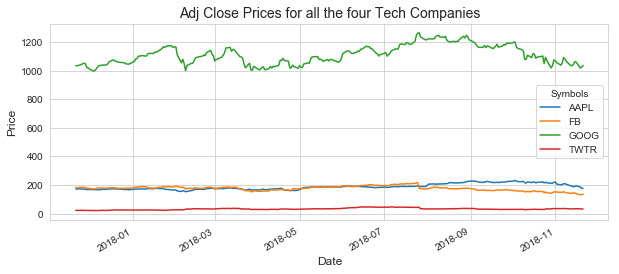

In [0]:
adj_close_df.plot(legend = True, figsize = (10, 4))
plt.title('Adj Close Prices for all the four Tech Companies', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
#plt.legend()
#plt.suptitle('Subtitle', fontsize = 14)

From the above figure, we can see that the tech company 'GOOG' always has quite a significant higher price than all other three companies. 

### Q2: What was the daily return of the stock on average?

#### E.g. 1. Daily return for only one tech company, AAPL

Text(0,0.5,'Percentage')

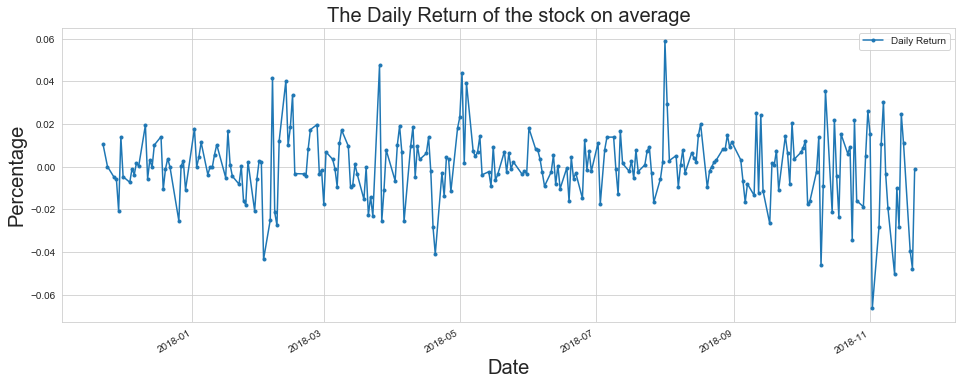

In [0]:
# percent change = (new-old)/old
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (16, 6), legend = True, linestyle = '-', marker = '.')
plt.title('The Daily Return of the stock on average', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)

In [0]:
for tech in ['AAPL', 'GOOG', 'FB', 'TWTR']:
    column_names = tech + '_pct'
    print(column_names)
    adj_close_df[column_names] = adj_close_df[tech].pct_change()

AAPL_pct
GOOG_pct
FB_pct
TWTR_pct


In [0]:
adj_close_df.head()

Symbols,AAPL,FB,GOOG,TWTR,AAPL_pct,GOOG_pct,FB_pct,TWTR_pct
Date,,,,,,,,
2017-11-21,170.579071,181.860001,1034.489990,21.879999,NaN,NaN,NaN,NaN
2017-11-22,172.372147,180.869995,1035.959961,22.270000,0.010512,0.001421,-0.005444,0.017825
2017-11-24,172.382004,182.779999,1040.609985,22.420000,0.000057,0.004489,0.010560,0.006736
2017-11-27,171.514999,183.029999,1054.209961,21.820000,-0.005030,0.013069,0.001368,-0.026762
2017-11-28,170.510101,182.419998,1047.410034,21.830000,-0.005859,-0.006450,-0.003333,0.000458


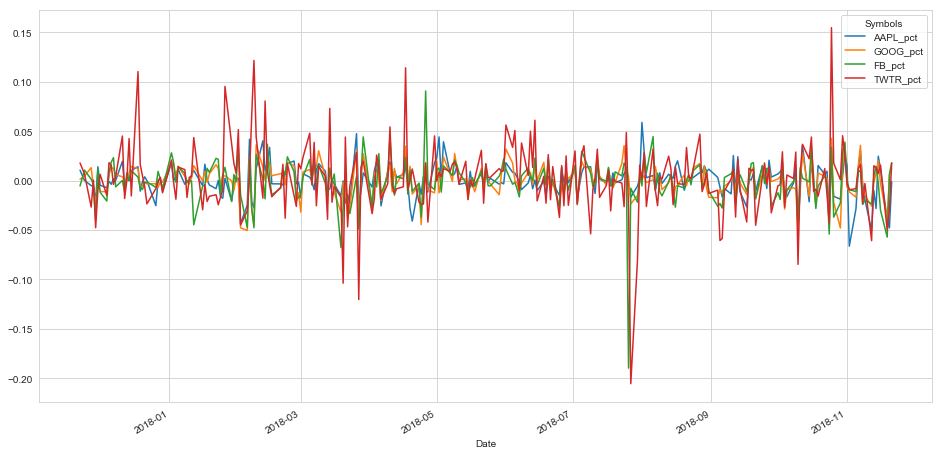

In [0]:
adj_close_df[['AAPL_pct', 'GOOG_pct', 'FB_pct', 'TWTR_pct']].plot(figsize = (16, 8))

Text(0.5,0,'Date')

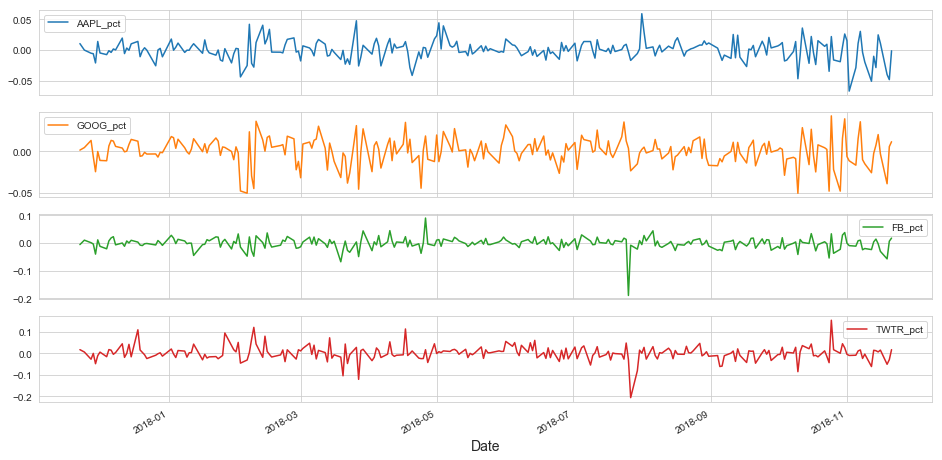

In [0]:
adj_close_df[['AAPL_pct', 'GOOG_pct', 'FB_pct', 'TWTR_pct']].plot(subplots = True, figsize = (16, 8));
plt.xlabel('Date', fontsize = 14)

From the figure above, the daily returns are quite stable for all the four tech companies, while FB is most stable. 

### Q3: What was the moving average of the various stocks?

#### Method 1. Get the moving average for each tech compnay each time separately

In [0]:
'''
move_days = [5, 10, 15, 20]
#tech_list = ['AAPL', 'GOOG', 'FB', 'TWTR']
# 1. moving average for 'AAPL'
for move in move_days:
    #for tech in techlist:
    column_name = 'AAPL_%s' %(str(move))
    adj_close_df[column_name] = adj_close_df['AAPL'].rolling(move).mean()
    
# 2. moving average for 'GOOG'
for move in move_days:
    #for tech in techlist:
    column_name = 'GOOG_%s' %(str(move))
    adj_close_df[column_name] = adj_close_df['GOOG'].rolling(move).mean()
    
# 3. moving average for 'AAPL'
for move in move_days:
    #for tech in techlist:
    column_name = 'FB_%s' %(str(move))
    adj_close_df[column_name] = adj_close_df['FB'].rolling(move).mean()
    
# 4. moving average for 'AAPL'
for move in move_days:
    #for tech in techlist:
    column_name = 'TWTR_%s' %(str(move))
    adj_close_df[column_name] = adj_close_df['TWTR'].rolling(move).mean()
'''

"\nmove_days = [5, 10, 15, 20]\n#tech_list = ['AAPL', 'GOOG', 'FB', 'TWTR']\n# 1. moving average for 'AAPL'\nfor move in move_days:\n    #for tech in techlist:\n    column_name = 'AAPL_%s' %(str(move))\n    adj_close_df[column_name] = adj_close_df['AAPL'].rolling(move).mean()\n    \n# 2. moving average for 'GOOG'\nfor move in move_days:\n    #for tech in techlist:\n    column_name = 'GOOG_%s' %(str(move))\n    adj_close_df[column_name] = adj_close_df['GOOG'].rolling(move).mean()\n    \n# 3. moving average for 'AAPL'\nfor move in move_days:\n    #for tech in techlist:\n    column_name = 'FB_%s' %(str(move))\n    adj_close_df[column_name] = adj_close_df['FB'].rolling(move).mean()\n    \n# 4. moving average for 'AAPL'\nfor move in move_days:\n    #for tech in techlist:\n    column_name = 'TWTR_%s' %(str(move))\n    adj_close_df[column_name] = adj_close_df['TWTR'].rolling(move).mean()\n"

#### Method 2. Get the moving average for all tech companies together one time

In [0]:
move_days = [20, 40, 60]
tech_list = ['AAPL', 'GOOG', 'FB', 'TWTR']
for tech in tech_list:
    for move in move_days:
        column_name = tech + '_%s' %(str(move))
      # column_name = tech + '_' + str(move)
        adj_close_df[column_name] = adj_close_df[tech].rolling(move).mean()

In [0]:
adj_close_df.head()

Symbols,AAPL,FB,GOOG,TWTR,AAPL_pct,GOOG_pct,FB_pct,TWTR_pct,AAPL_20,AAPL_40,AAPL_60,GOOG_20,GOOG_40,GOOG_60,FB_20,FB_40,FB_60,TWTR_20,TWTR_40,TWTR_60
Date,,,,,,,,,,,,,,,,,,,,
2017-11-21,170.579071,181.860001,1034.489990,21.879999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-22,172.372147,180.869995,1035.959961,22.270000,0.010512,0.001421,-0.005444,0.017825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-24,172.382004,182.779999,1040.609985,22.420000,0.000057,0.004489,0.010560,0.006736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-27,171.514999,183.029999,1054.209961,21.820000,-0.005030,0.013069,0.001368,-0.026762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-28,170.510101,182.419998,1047.410034,21.830000,-0.005859,-0.006450,-0.003333,0.000458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,0,'Date')

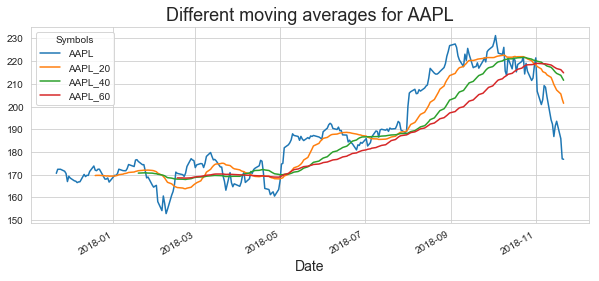

In [0]:
adj_close_df[['AAPL', 'AAPL_20', 'AAPL_40', 'AAPL_60']].plot(subplots = False, figsize = (10, 4))
plt.title('Different moving averages for AAPL', fontsize = 18)
plt.xlabel('Date', fontsize = 14)

Text(0.5,0,'Date')

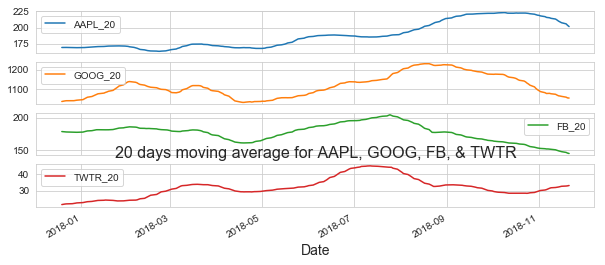

In [0]:
adj_close_df[['AAPL_20', 'GOOG_20', 'FB_20', 'TWTR_20']].plot(subplots = True, figsize = (10, 4))
plt.title('20 days moving average for AAPL, GOOG, FB, & TWTR', fontsize = 16)
plt.xlabel('Date', fontsize = 14)

#### Method 3. Get the moving average for each tech compnay each variable

In [0]:
# calculate the movie average for the stock
# A moving average helps cut down the amount of "noise" on a price chart
ma_day = [10, 20, 50]

for ma in ma_day:
    
    column_name = 'MA for %s days' %(str(ma))
    
    #AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [0]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2017-11-21,173.699997,170.779999,170.779999,173.139999,25131300.0,170.579071,NaN,NaN,NaN,NaN
2017-11-22,175.000000,173.050003,173.360001,174.960007,25588900.0,172.372147,0.010512,NaN,NaN,NaN
2017-11-24,175.500000,174.649994,175.100006,174.970001,14026700.0,172.382004,0.000057,NaN,NaN,NaN
2017-11-27,175.080002,173.339996,175.050003,174.089996,20716800.0,171.514999,-0.005030,NaN,NaN,NaN
2017-11-28,174.869995,171.860001,174.300003,173.070007,26428800.0,170.510101,-0.005859,NaN,NaN,NaN


Text(0.5,1,'Different moving averages for AAPL')

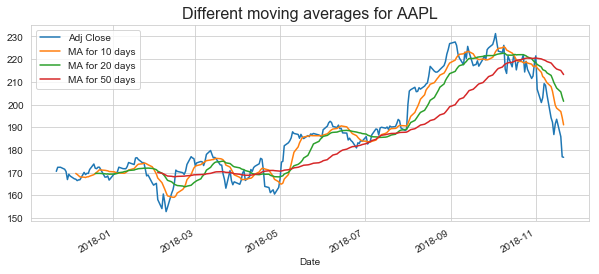

In [0]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4))
plt.title('Different moving averages for AAPL', fontsize = 16)
#plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a3a440588>,
      dtype=object)

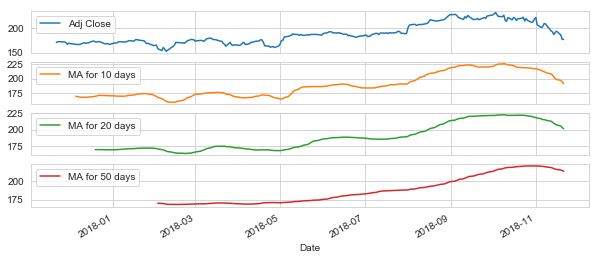

In [0]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = True, figsize = (10, 4))

### Q4: What was the correlation between different stocks closing prices?

In [0]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Return,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2017-11-21,173.699997,170.779999,170.779999,173.139999,25131300.0,170.579071,NaN,NaN,NaN,NaN
2017-11-22,175.000000,173.050003,173.360001,174.960007,25588900.0,172.372147,0.010512,NaN,NaN,NaN
2017-11-24,175.500000,174.649994,175.100006,174.970001,14026700.0,172.382004,0.000057,NaN,NaN,NaN
2017-11-27,175.080002,173.339996,175.050003,174.089996,20716800.0,171.514999,-0.005030,NaN,NaN,NaN
2017-11-28,174.869995,171.860001,174.300003,173.070007,26428800.0,170.510101,-0.005859,NaN,NaN,NaN


#### Method 1. Histogram for the frequency distribution, 'sns'

/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


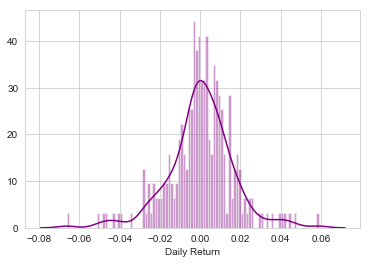

In [0]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'Purple')

/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'The histogram for Daily Return')

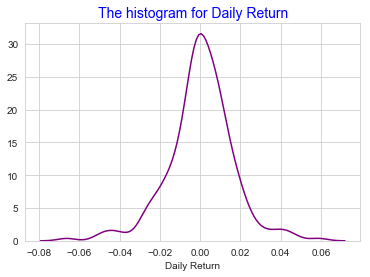

In [0]:
# style must be normal, italic or oblique
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'Purple', hist = False)
plt.title('The histogram for Daily Return', fontsize = 14, color = 'Blue', style = 'normal')

The distribution of the daily return is almost normally distributed around mean = 0 and std = 0.0146.

#### Method 2. Histogram for the frequency distribution, 'hist'

/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


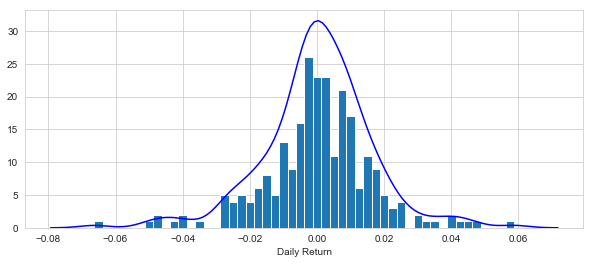

In [0]:
# bins = 10 by default
AAPL['Daily Return'].hist(bins = 50, figsize = (10, 4))
#sns.kdeplot(AAPL['Daily Return'])
sns.distplot(AAPL['Daily Return'].dropna(), color = 'Blue', hist = False)

In [0]:
# explore the closing price for all companies
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [0]:
closing_df.head()

Symbols,AAPL,FB,GOOG,TWTR
Date,,,,
2017-11-21,170.579071,181.860001,1034.489990,21.879999
2017-11-22,172.372147,180.869995,1035.959961,22.270000
2017-11-24,172.382004,182.779999,1040.609985,22.420000
2017-11-27,171.514999,183.029999,1054.209961,21.820000
2017-11-28,170.510101,182.419998,1047.410034,21.830000


#### Method 3. 'plot'

Text(0,0.5,'Price')

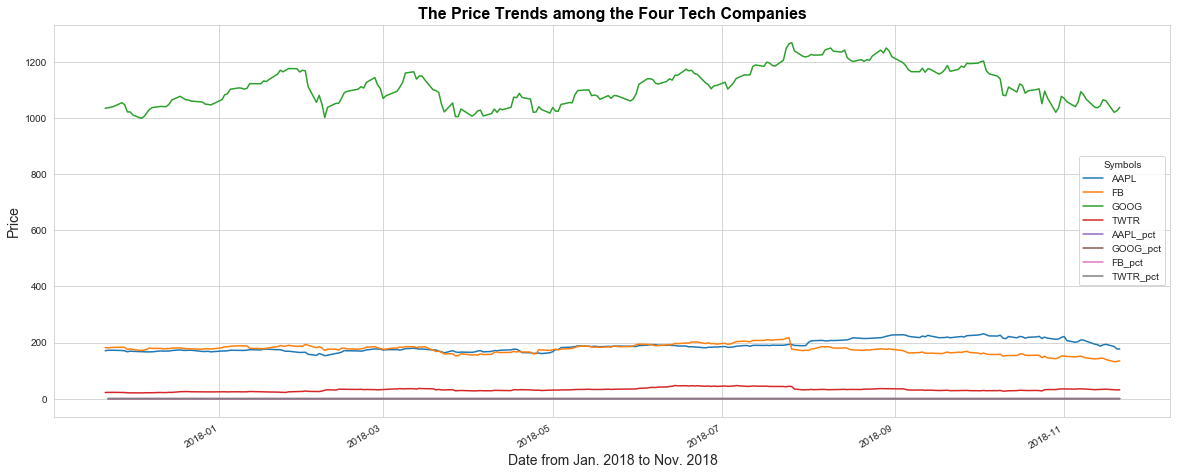

In [0]:
closing_df.plot(subplots = False, figsize = (20, 8), legend = True)
plt.title('The Price Trends among the Four Tech Companies', fontsize = 16, color = 'Black', 
          style = 'normal', weight = 'bold')
plt.xlabel('Date from Jan. 2018 to Nov. 2018', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
#plt.legend()

In [0]:
# pct_change get the change 
# tech_rets = closing_df.pct_change()
for tech in tech_list:
    column_names = tech + '_pct'
    print(column_names)
    closing_df[column_names] = closing_df[tech].pct_change()

AAPL_pct
GOOG_pct
FB_pct
TWTR_pct


In [0]:
closing_df.head()

Symbols,AAPL,FB,GOOG,TWTR,AAPL_pct,GOOG_pct,FB_pct,TWTR_pct
Date,,,,,,,,
2017-11-21,170.579071,181.860001,1034.489990,21.879999,NaN,NaN,NaN,NaN
2017-11-22,172.372147,180.869995,1035.959961,22.270000,0.010512,0.001421,-0.005444,0.017825
2017-11-24,172.382004,182.779999,1040.609985,22.420000,0.000057,0.004489,0.010560,0.006736
2017-11-27,171.514999,183.029999,1054.209961,21.820000,-0.005030,0.013069,0.001368,-0.026762
2017-11-28,170.510101,182.419998,1047.410034,21.830000,-0.005859,-0.006450,-0.003333,0.000458


In [0]:
tech_rets = closing_df[['AAPL_pct', 'GOOG_pct', 'FB_pct', 'TWTR_pct']]
tech_rets.head()

Symbols,AAPL_pct,GOOG_pct,FB_pct,TWTR_pct
Date,,,,
2017-11-21,NaN,NaN,NaN,NaN
2017-11-22,0.010512,0.001421,-0.005444,0.017825
2017-11-24,0.000057,0.004489,0.010560,0.006736
2017-11-27,-0.005030,0.013069,0.001368,-0.026762
2017-11-28,-0.005859,-0.006450,-0.003333,0.000458


/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


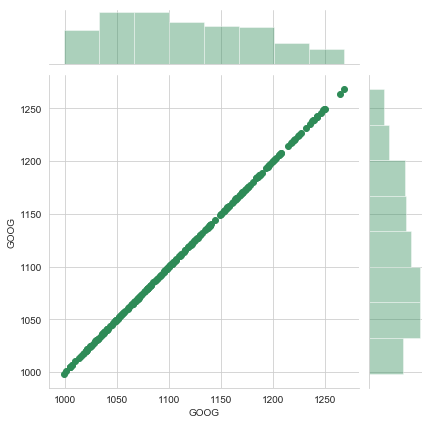

In [0]:
# kind can be 'scatter', 'reg', 'resid', 'kde', or 'hex'
sns.jointplot('GOOG', 'GOOG', data = closing_df, kind = 'scatter', color = 'seagreen')

/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


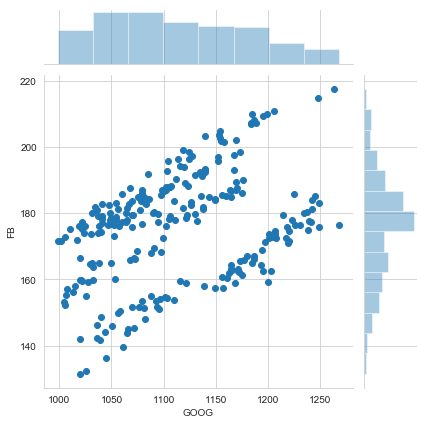

In [0]:
sns.jointplot('GOOG', 'FB', data = closing_df, kind = 'scatter')

The pearson value (officially known as the Pearson product-moment correlation coefficient) can give us a sense of how correlated the closing price are. 

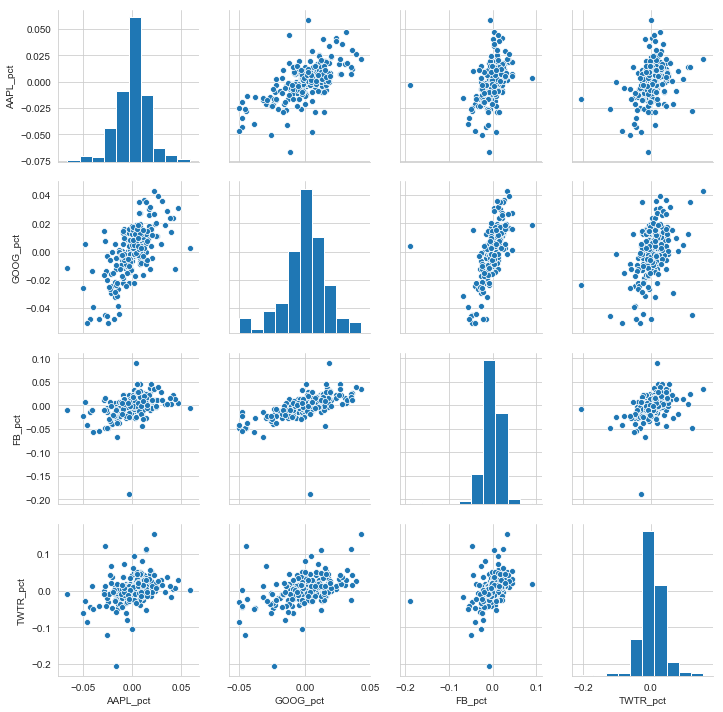

In [0]:
sns.pairplot(tech_rets.dropna())

/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


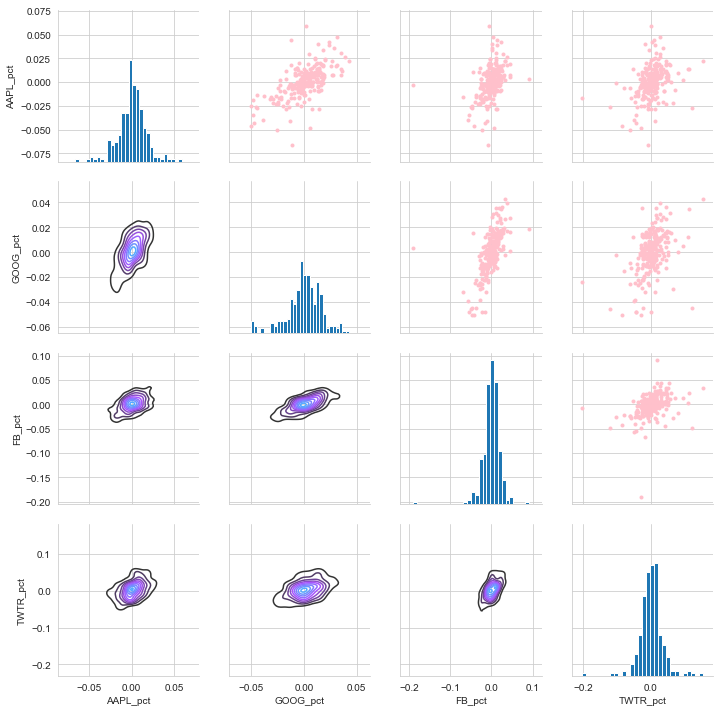

In [0]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color = 'pink', marker = '.')
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
returns_fig.map_diag(plt.hist, bins = 30)

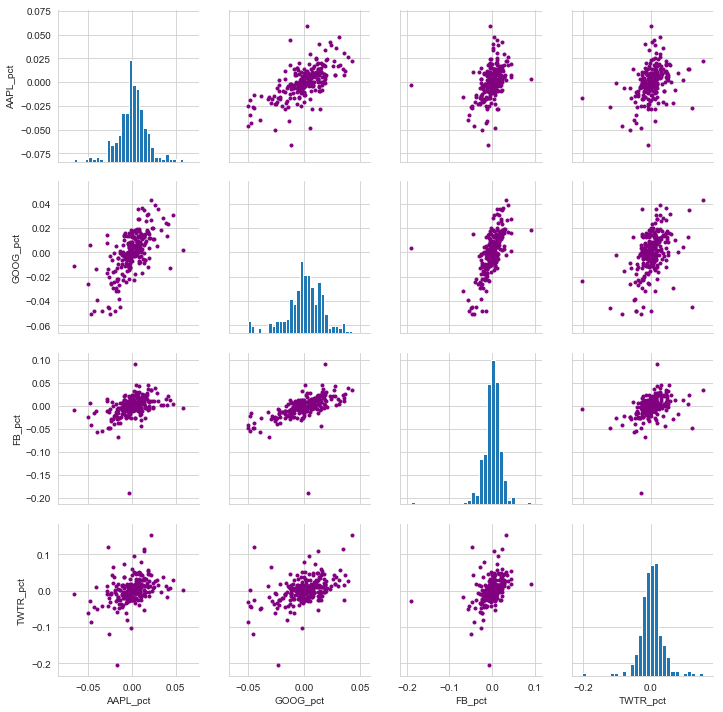

In [0]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_offdiag(plt.scatter, color = 'purple', marker = '.')
returns_fig.map_diag(plt.hist, bins = 30)

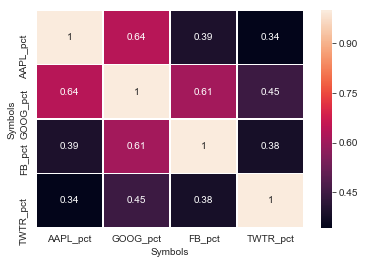

In [0]:
sns.heatmap(tech_rets.dropna().corr(), annot = True, linewidth = 0.5)

In [0]:
rets = tech_rets.dropna()
rets.columns

Index(['AAPL_pct', 'GOOG_pct', 'FB_pct', 'TWTR_pct'], dtype='object', name='Symbols')

In [0]:
rets.mean()*100

Symbols
AAPL_pct    0.030306
GOOG_pct    0.017578
FB_pct     -0.088949
TWTR_pct    0.208371
dtype: float64

## Part 3: Basic Analysis of Stock Information via Data Analysis

In [0]:
# How investment risk is quantified
url = 'https://www.investopedia.com/articles/investing/032415/how-investment-risk-quantified.asp'

In [0]:
# Example
url = 'https://www.investopedia.com/walkthrough/corporate-finance/4/return-risk/expected-return.aspx'

#### risk = the mean/std. We can use the 'bootstrap' method, or Monte Carlo method.

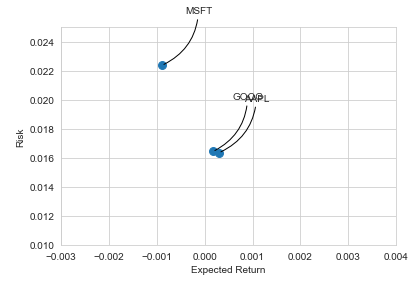

In [0]:
# s =  the size of the circle.
area = np.pi * 20

plt.scatter(rets.mean(), rets.std(), s = area)   # s = size

# set the x and y limits of the plot
plt.ylim([0.01, 0.025])
plt.xlim([-0.003, 0.004])

plt.xlabel('Expected Return')  # the mean
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'TWTR'], rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y),  xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad = -0.3', color = 'black'))


We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. For this method we will calculate the empirical quantitles from a histogram of daily returns. 

#### Method 1: 'Bootstrap' method to calculate the risk, with quantitle

/Users/xslittlemaggie/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


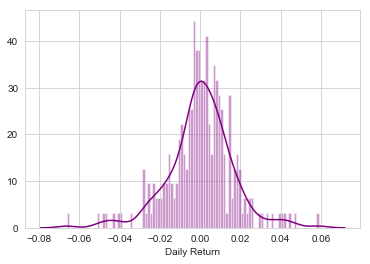

In [0]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [0]:
rets.head()

Symbols,AAPL_pct,GOOG_pct,FB_pct,TWTR_pct
Date,,,,
2017-11-22,0.010512,0.001421,-0.005444,0.017825
2017-11-24,0.000057,0.004489,0.010560,0.006736
2017-11-27,-0.005030,0.013069,0.001368,-0.026762
2017-11-28,-0.005859,-0.006450,-0.003333,0.000458
2017-11-29,-0.020743,-0.024585,-0.039963,-0.047641


In [0]:
rets['AAPL_pct'].quantile(0.05)

-0.026084349909528792

In [0]:
rets['AAPL_pct'].median() == rets['AAPL_pct'].quantile(0.5)

True

The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR (value at risk) is 0.026 * 1,000,000=$26,000

#### Method 2: Monte Carlo method to calculate the Value at Risk

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is. 

Use the geometric Brownian motion (GBM), which is technically known as Markov process. This means that the stock price follows a random walk and is consistent with ( at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorported and the next price movement is *conditionally independent* of the past price of a stock. 

In [0]:
days = 365

dt = 1/days
mu = rets.mean()['GOOG_pct']

sigma = rets.std()['GOOG_pct']

In [0]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))       
        drift[x] = mu * dt 
        price[x] = price [x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price


In [0]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-21,1035.109985,1022.655029,1023.309998,1034.489990,1097000,1034.489990
2017-11-22,1039.706055,1031.430054,1035.000000,1035.959961,746300,1035.959961
2017-11-24,1043.177979,1035.000000,1035.869995,1040.609985,537000,1040.609985
2017-11-27,1055.459961,1038.439941,1040.000000,1054.209961,1307900,1054.209961
2017-11-28,1062.375000,1040.000000,1055.089966,1047.410034,1424400,1047.410034


Text(0.5,1,'Monte Caro Analysis for Google')

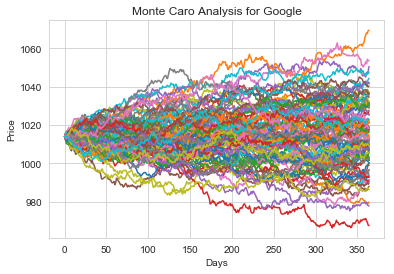

In [0]:
start_price = 1014

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Caro Analysis for Google')

Text(0.5,1,'Monte Caro Analysis for Google')

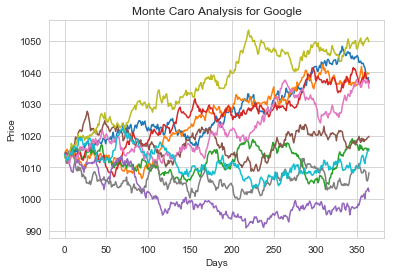

In [0]:
start_price = 1014

for run in range(10):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Caro Analysis for Google')

In [0]:
runs = 10000

simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days - 1]

Text(0.5,1,'Final price distribution for Google stock after 365 days')

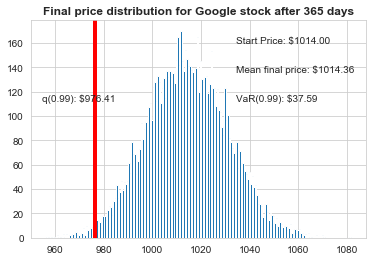

In [0]:
# now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins = 200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6, 0.8, s = 'Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6, 0.7, 'Mean final price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

# Dsiplay 1% quantile
plt.figtext(0.15, 0.6, 'q(0.99): $%.2f' % q)

# Plot a line at the 1% quantile result
plt.axvline(x = q, linewidth = 4, color = 'r')

# Title
plt.title('Final price distribution for Google stock after %s days' %days, weight = 'bold')

It is 99% that the risk is 36.23 dollars. Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be 37.59 dollars for every investment of 1014 dollars (the price of one initial google stock).
This basically means for every initial stock you purchase you putting about 37.59 dollars at risk 99% of the time from our Monte Carlo Simulaiton.

### part 5: How much value do we put at risk by investing in a particular stock?

### part 6: How can we attempt to predict future stock behavior?

#### Other questions

##### 1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

##### 2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

##### 3.) Look further into correlation of two stocks and see if that gives you any insight into future possible stock prices.